In [4]:
import pandas as pd
file = './data/MOE_GRID_1078.xlsx'
data = pd.read_excel(open(file, "rb"))

rd = {"DESCRIPTOR" : "GRID_DESCRIPTOR"}
data.rename(columns = rd, inplace=True)

for v in data.columns:
    print("\""+v+"\"")

"Unnamed: 0"
"Unnamed: 0.1"
"UNIQUEID"
"SMILE"
"SETID"
"GRID_DESCRIPTOR"
"LOGD"
"mol"
"AM1_dipole"
"AM1_E"
"AM1_Eele"
"AM1_HF"
"AM1_HOMO"
"AM1_IP"
"AM1_LUMO"
"apol"
"ASA"
"ASA+"
"ASA-"
"ASA_H"
"ASA_P"
"ast_fraglike"
"ast_fraglike_ext"
"ast_violation"
"ast_violation_ext"
"a_acc"
"a_acid"
"a_aro"
"a_base"
"a_count"
"a_don"
"a_donacc"
"a_heavy"
"a_hyd"
"a_IC"
"a_ICM"
"a_nB"
"a_nBr"
"a_nC"
"a_nCl"
"a_nF"
"a_nH"
"a_nI"
"a_nN"
"a_nO"
"a_nP"
"a_nS"
"balabanJ"
"BCUT_PEOE_0"
"BCUT_PEOE_1"
"BCUT_PEOE_2"
"BCUT_PEOE_3"
"BCUT_SLOGP_0"
"BCUT_SLOGP_1"
"BCUT_SLOGP_2"
"BCUT_SLOGP_3"
"BCUT_SMR_0"
"BCUT_SMR_1"
"BCUT_SMR_2"
"BCUT_SMR_3"
"bpol"
"b_1rotN"
"b_1rotR"
"b_ar"
"b_count"
"b_double"
"b_heavy"
"b_max1len"
"b_rotN"
"b_rotR"
"b_single"
"b_triple"
"CASA+"
"CASA-"
"chi0"
"chi0v"
"chi0v_C"
"chi0_C"
"chi1"
"chi1v"
"chi1v_C"
"chi1_C"
"chiral"
"chiral_u"
"DASA"
"DCASA"
"dens"
"density"
"diameter"
"dipole"
"dipoleX"
"dipoleY"
"dipoleZ"
"E"
"E_ang"
"E_ele"
"E_nb"
"E_oop"
"E_rele"
"E_rnb"
"E_rsol"
"E_rvdw"
"E

In [5]:
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "a_base", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "GRID_DESCRIPTOR"]

basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(data["UNIQUEID"]):
    
    fdesc = data[data["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "GRID_DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = data[data["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = data[data["UNIQUEID"] == ss]['SETID'].values[0]
    uid = data[data["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)

for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 29)
GM  : 
   (1078,) (1078, 1908)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 29)
MTr  : 
   (865,) (865, 29)
GMTe  : 
   (213,) (213, 1908)
GMTr  : 
   (865,) (865, 1908)


In [8]:
data_GRID = pd.DataFrame(X['G'])
data_GRID

,0,1,2,3,4,5,6,7,8,9,...,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1074,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1075,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1076,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
MEAN_val = data_GRID.mean(axis=0)
print(MEAN_val)

0       1.000000
1       0.001855
2       0.000928
3       0.002783
4       0.000928
          ...   
1874    0.000928
1875    0.001855
1876    0.001855
1877    0.005566
1878    0.001855
Length: 1879, dtype: float64


In [12]:
VAR_val = data_GRID.var(axis=0)
print(VAR_val)

0       0.000000
1       0.001854
2       0.000928
3       0.002778
4       0.000928
          ...   
1874    0.000928
1875    0.001854
1876    0.003711
1877    0.005540
1878    0.001854
Length: 1879, dtype: float64


In [13]:
mean_var_dataframe = pd.DataFrame( MEAN_val, columns=['means'])
mean_var_dataframe['var'] = VAR_val
mean_var_dataframe

,means,var
0,1.000000,0.000000
1,0.001855,0.001854
2,0.000928,0.000928
3,0.002783,0.002778
4,0.000928,0.000928
...,...,...
1874,0.000928,0.000928
1875,0.001855,0.001854
1876,0.001855,0.003711
1877,0.005566,0.005540


In [14]:
lista_idx = list(range(0,1879))
print(lista_idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

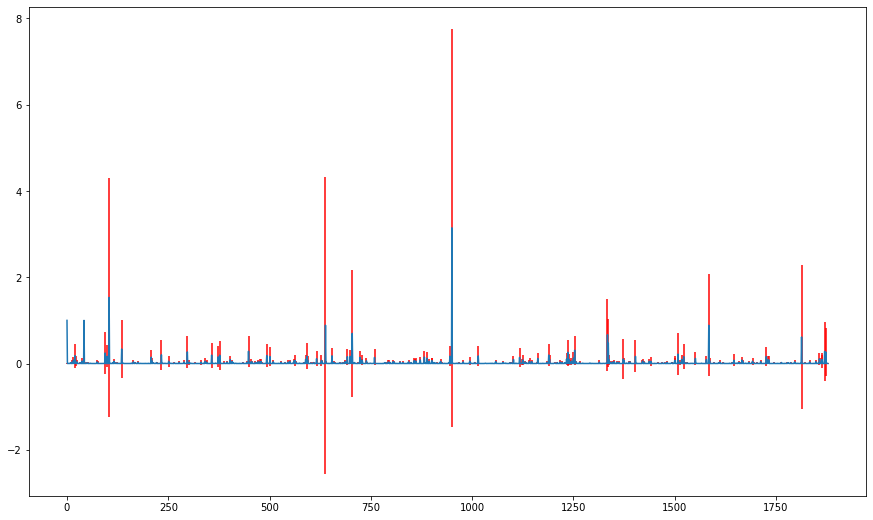

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,9])
plt.errorbar(lista_idx, mean_var_dataframe['means'], yerr=mean_var_dataframe['var'], ecolor=['red'])
plt.show()

In [21]:
mean_var_dataframe
mean_var_dataframe.to_csv("mean_var_dataframe_GRID.csv")

In [25]:
for idx, val in enumerate (mean_var_dataframe['var']) :
    print(idx,val)

0 0.0
1 0.001853564925590468
2 0.0009276437847866228
3 0.0027777634224112452
4 0.0009276437847866103
5 0.0027777634224112452
6 0.003700239275249218
7 0.00092764378478663
8 0.0009276437847866221
9 0.0182255733389828
10 0.0009276437847866334
11 0.0009276437847866255
12 0.04728657733034968
13 0.0009276437847866309
14 0.004620992484104369
15 0.004620992484104296
16 0.07856031751773968
17 0.0009276437847866374
18 0.0009276437847866104
19 0.020010232505257856
20 0.2820114624730586
21 0.1148659007791531
22 0.0009276437847866204
23 0.020010232505257554
24 0.0
25 0.03589645531547672
26 0.0009276437847866348
27 0.0009276437847866297
28 0.0009276437847866359
29 0.0009276437847866365
30 0.0009276437847866403
31 0.0009276437847866413
32 0.0027777634224111676
33 0.01911876424411226
34 0.0009276437847866323
35 0.0009276437847866141
36 0.0009276437847866271
37 0.07571795494596853
38 0.0009276437847866379
39 0.0009276437847866088
40 0.0009276437847866091
41 0.0009276437847866347
42 0.0
43 0.00092764378

853 0.0009276437847866127
854 0.0009276437847866126
855 0.0009276437847866134
856 0.000927643784786621
857 0.06238727448437077
858 0.0009276437847866228
859 0.049484671052517686
860 0.0009276437847866275
861 0.07592467222391537
862 0.0009276437847866207
863 0.0009276437847866263
864 0.0009276437847866358
865 0.0027777634224111724
866 0.0009276437847866327
867 0.0037002392752492038
868 0.0009276437847866348
869 0.0009276437847866245
870 0.0009276437847866147
871 0.004620992484104432
872 0.07658875147932007
873 0.0
874 0.0009276437847866183
875 0.0018535649255903967
876 0.0009276437847866225
877 0.0009276437847866299
878 0.0009276437847866256
879 0.0009276437847866286
880 0.0009276437847866093
881 0.022674301424798152
882 0.13273402549168717
883 0.0037002392752491686
884 0.0009276437847866102
885 0.0009276437847866132
886 0.014687262598125965
887 0.0009276437847866081
888 0.0009276437847866365
889 0.1388700833587428
890 0.0009276437847866178
891 0.0009276437847866414
892 0.00092764378478

1433 0.0009276437847866273
1434 0.0009276437847866223
1435 0.0
1436 0.000927643784786616
1437 0.054033312489341526
1438 0.0009276437847866232
1439 0.0
1440 0.0009276437847866132
1441 0.10129146619397332
1442 0.0009276437847866246
1443 0.003700239275249141
1444 0.004620992484104382
1445 0.0009276437847866089
1446 0.0009276437847866167
1447 0.0009276437847866202
1448 0.0009276437847866377
1449 0.0009276437847866245
1450 0.005540023048976529
1451 0.0009276437847866121
1452 0.000927643784786613
1453 0.0009276437847866335
1454 0.0009276437847866278
1455 0.0009276437847866082
1456 0.0018535649255904615
1457 0.0055400230489765605
1458 0.0221600921959062
1459 0.008286778879695688
1460 0.0009276437847866378
1461 0.0009276437847866165
1462 0.000927643784786627
1463 0.0009276437847866365
1464 0.0009276437847866204
1465 0.0009276437847866309
1466 0.0009276437847866353
1467 0.0009276437847866303
1468 0.000927643784786626
1469 0.015535664759699586
1470 0.0009276437847866106
1471 0.000927643784786637

In [33]:
for idx, val in enumerate (mean_var_dataframe['var']) :
    if val==0:
        print(idx)

0
24
42
75
196
376
379
384
390
446
520
610
612
614
690
716
735
779
786
797
823
842
873
943
948
975
1043
1120
1168
1294
1328
1346
1406
1422
1435
1439
1480
1527
1547
1568
1577
1587
1710
1718
1742
1749
1783
1802


In [37]:
for idx, val in enumerate (mean_var_dataframe['var']) :
    if val>4:
        print(idx)

950


In [38]:
for idx, val in enumerate (mean_var_dataframe['var']) :
    if val>3:
        print(idx)

638
950


In [39]:
for idx, val in enumerate (mean_var_dataframe['var']) :
    if val>2:
        print(idx)

104
638
950


In [40]:
for idx, val in enumerate (mean_var_dataframe['var']) :
    if val>1:
        print(idx)

104
638
704
950
1584
1813


In [41]:
for idx, val in enumerate (mean_var_dataframe['var']) :
    if val>0.5:
        print(idx)

104
135
638
704
950
1334
1336
1584
1813
1870
1873
